## Logistic Regression

In [1]:
import sys
print(sys.version)
print('\n'.join(sys.path)) # does this show the files and folders you need?

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

/home/johan/anaconda2/envs/tensorflow_py3/lib/python35.zip
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/plat-linux
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/lib-dynload
/home/johan/.local/lib/python3.5/site-packages
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages/torchvision-0.2.1-py3.5.egg
/home/johan/.local/lib/python3.5/site-packages/IPython/extensions
/home/johan/.ipython


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='y', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='g', s=40, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [5]:
data = loaddata('2. Programming Exercise 2: Logistic Regression/ex2/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


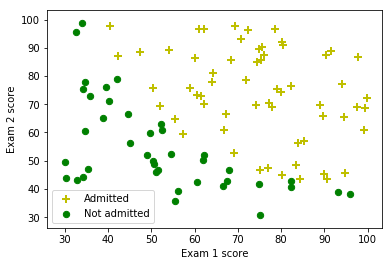

In [6]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

Logistic regression hypothesis

$$h_{\theta}(x) = g(\theta^{T}x)$$

where function g is the sigmoid function. The sigmoid function is defined as:

$$g(z)=\frac{1}{1+e^{-z}} $$

In [7]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Cost Function

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

Vectorized Cost Function

$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$


In [8]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).
Partial derivative


$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 


Vectorized


$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [9]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost at initial theta (zeros): \n', cost)
print('Gradient at initial theta (zeros)\n', grad)

Cost at initial theta (zeros): 
 0.6931471805599453
Gradient at initial theta (zeros)
 [ -0.1        -12.00921659 -11.26284221]


In [10]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
print(res.message)
print('Expected cost',res.fun)
print('Expected theta',res.x)

Optimization terminated successfully.
Expected cost 0.20349770158950983
Expected theta [-25.16131634   0.2062316    0.20147143]


/home/johan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/johan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [11]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))
p = predict(res.x, X) 
print('redict using the optimized Theta values:\n',p)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

redict using the optimized Theta values:
 [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
Train accuracy 89.0%


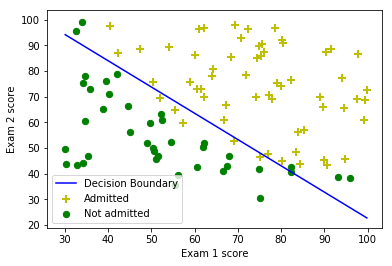

In [12]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./res.x[2])*(res.x[0] + res.x[1]*boundary_xs)
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()


Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


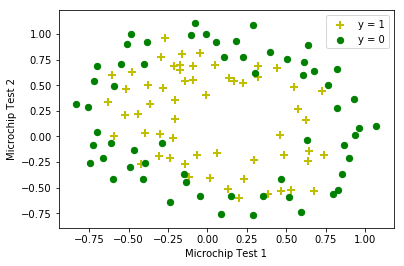

In [13]:
data2 = loaddata('2. Programming Exercise 2: Logistic Regression/ex2/ex2data2.txt', ',')
y = np.c_[data2[:,2]]
X = data2[:,0:2]
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

Feature mapping
One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x1 and x2 up to the sixth power.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [14]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])

Regularized Cost Function


$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-
h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$


Vectorized Cost Function


$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [15]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Partial derivative

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 

Vectorized

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$

$$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [16]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

initial_theta = np.zeros(XX.shape[1])
print ('Cost at initial theta (zeros)',costFunctionReg(initial_theta, 1, XX, y))
print ('Gradient at initial theta (zeros) - first five values only:\n',gradientReg(initial_theta, 1, XX, y)[0:5])


Cost at initial theta (zeros) 0.6931471805599454
Gradient at initial theta (zeros) - first five values only:
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


i 0 C 0
i 1 C 1
i 2 C 100


/home/johan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


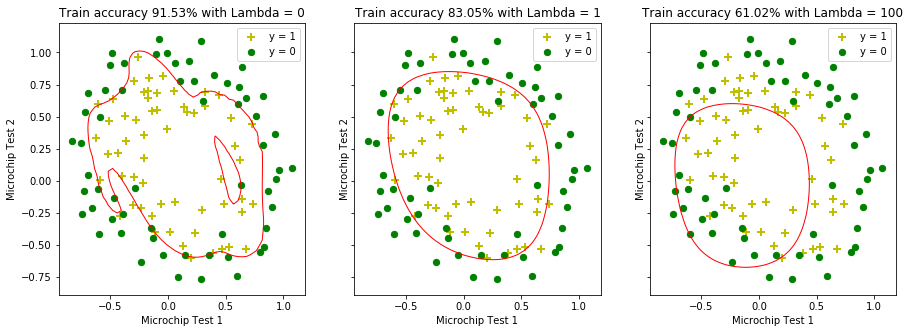

In [17]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(15,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    print ('i',i,'C',C)
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    #    print (xx1.shape,xx1)
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='r');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

